In [22]:
import random as rnd
import pandas as pd
import numpy as np
import csv
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import perceptron
from random import randint
%matplotlib inline

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/andSVM_2.csv")
df

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1
5,3,2,1
6,0,-1,0


In [7]:
datosX = df[df.columns[0:2]]
datosY = df[df.columns[2]]
datosX=np.asarray(datosX)
datosY=np.asarray(datosY)
datosX

array([[ 0,  0],
       [ 0,  1],
       [ 1,  0],
       [ 1,  1],
       [ 2,  3],
       [ 3,  2],
       [ 0, -1]])

In [8]:
datosY

array([0, 0, 0, 1, 1, 1, 0])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(datosX,datosY, train_size=0.75)

In [10]:
#Si escalamos los datos
scaleX = StandardScaler()
scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
X_test=scaleX.transform(X_test)

/Users/apple/Desktop/MachineLearning/venvPrueba/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
def entrena(x_train,y_train,w0,w1,w2,eta):
    z = 0
    g = 0
    error = 0
    w = []
    while (z<1000):
        z = z + 1
        for i in range(len(x_train)):
            if (w0 + w1*x_train[i][0]+w2*x_train[i][1] ) > 0:
                g = 1
                
            else:
                g = 0
            
            error_w3 = y_train[i] - g
            w0 = w0 + error*eta
            w1= w1 + error*eta*x_train[i][0]
            w2 = w2 + error*eta*x_train[i][1]
    w.append(w0)
    w.append(w1)
    w.append(w2)
    return w

def salida(x_test,y_test,w):
    error_array = []
    y_estimada = []
    
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    
    for i in range(len(x_test)):
        g = w0 + w1*x_test[i][0] + w2*x_test[i][1]
        if g > 0:
            g = 1
        else:
            g = 0
        error = y_test[i] - g
        error_array.append(error)
        y_estimada.append(g)
    return error_array, y_estimada


In [12]:
w0i = rnd.random()
w1i = rnd.random()
w2i = rnd.random()

w=entrena(X_train,Y_train,w0i,w1i,w2i,0.5)

error_array, y_estimada = salida(X_test,Y_test,w)

print(w[0]),
print(w[1]),
print(w[2])

0.0677995297641 0.0531890995007 0.301071846734


In [13]:
net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(datosX,datosY)

/Users/apple/Desktop/MachineLearning/venvPrueba/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.002, fit_intercept=True,
      max_iter=None, n_iter=100, n_jobs=1, penalty=None, random_state=None,
      shuffle=True, tol=None, verbose=0, warm_start=False)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


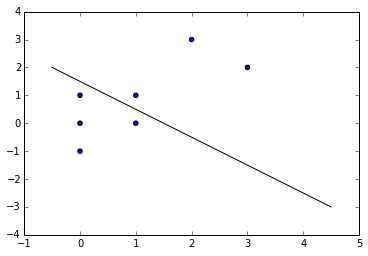

In [14]:

w = net.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 2,100)
yy = a * xx - (net.intercept_[0]) / w[1]
 
plt.scatter(df.X1, df.X2)
# Plot the line
plt.plot(yy,xx, 'k-')

In [15]:
clf = SVC(kernel='linear')
clf.fit(datosX, datosY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
clf.support_vectors_

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  1.]])

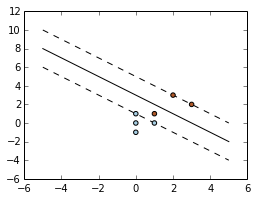

In [17]:
fignum = 1
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(fignum, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')


plt.scatter(datosX[:, 0], datosX[:, 1], c=datosY, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')


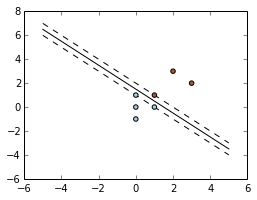

In [18]:
clf = SVC(kernel='linear', C=100)
clf.fit(datosX, datosY)

clf.support_vectors_

fignum = 1
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(fignum, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')


plt.scatter(datosX[:, 0], datosX[:, 1], c=datosY, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')


In [41]:
datosX = []
datosY=[]
for x in range(0, 50):
    datosAux = []
    x1=randint(-10, 10)
    x2=randint(-10, 10)
    datosAux.append(x1)
    datosAux.append(x2)
    datosX.append(datosAux)
    if x1**2 + x2**2 < 25:
        y=1
    else:
        y=0
    datosY.append(y)

datosX=np.asarray(datosX)
datosY=np.asarray(datosY)

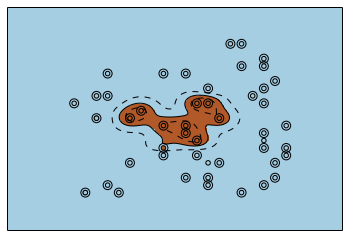

In [49]:
clf = SVC(kernel='rbf', C=1
         )
clf.fit(datosX, datosY)

clf.support_vectors_

fignum = 1
# get the separating hyperplane
plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(datosX[:, 0], datosX[:, 1], c=datosY, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min = -15
x_max = 15
y_min = -15
y_max = 15

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(fignum, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()